In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
data_old = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')


In [3]:
data_old.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
data_old = data_old.sample(frac=1) 

In [5]:
data_old.head(-10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
143899,0463311984751990,"""\n\nWhilst I don't agree with your reasoning,...",0,0,0,0,0,0
20653,3686d412ab1419b5,Hello \n\nHello Dekisugi. A few things...\n\nT...,0,0,0,0,0,0
21901,39b90bf369cf6b7c,Congrats on your first Headley experience Fain...,0,0,0,0,0,0
100961,1c5727744c197099,"Lists of schools\nHi, just noticed that you ar...",0,0,0,0,0,0
32126,55612789b2cb5452,""":""""around 20,000"""" is something you have made...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
17462,2e17773bd9cd2ca3,The other thing worth mentioning is that all t...,0,0,0,0,0,0
54864,92a3a121ff1a7f99,Thanks both of you for your time,0,0,0,0,0,0
77123,ce8997ff72e7e018,I'm going to need some more information that. ...,0,0,0,0,0,0
61694,a51f2cd4c9f3db61,"I personally do like the hidden list, but I th...",0,0,0,0,0,0


In [6]:
len(data_old)

159571

In [7]:
# test_data # Many zeros

In [8]:
updated_data_toxic = data_old[data_old['toxic'] ==1]
data_v2 = data_old[~data_old['id'].isin(updated_data_toxic['id'])]
updated_data_obs = data_v2[data_v2['obscene'] ==1]
data_v3 = data_v2[~data_v2['id'].isin(updated_data_obs['id'])]
print(len(updated_data_toxic))
print(len(updated_data_obs))
len(data_v3)

15294
523


143754

In [12]:
import pandas as pd

# Adjust display settings
pd.set_option('display.max_colwidth', None)

# Display the first 10 rows of 'comment_text' column
print(updated_data_toxic.head(-10)['comment_text'])


27879                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [97]:
updated_data_threat = data_v3[data_v3['threat'] ==1]
data_v4 = data_v3[~data_v3['id'].isin(updated_data_threat['id'])]
print(len(updated_data_threat))
len(data_v4)

25


143729

In [98]:
updated_data_insult = data_v4[data_v4['insult'] ==1]
data_v5 = data_v4[~data_v4['id'].isin(updated_data_insult['id'])]
print(len(updated_data_insult))
len(data_v5)

329


143400

In [99]:
updated_data_hate = data_v5[data_v5['identity_hate'] ==1]
data_v6 = data_v5[~data_v5['id'].isin(updated_data_hate['id'])]
print(len(updated_data_hate))
len(data_v6)

54


143346

# Getting all ones

In [100]:
all_ones = updated_data_toxic[(updated_data_toxic['identity_hate'] ==1) & (updated_data_toxic['insult'] ==1) & (updated_data_toxic['threat']  ==1) & (updated_data_toxic['toxic'] ==1) &(updated_data_toxic['obscene'] ==1) &(updated_data_toxic['severe_toxic'] ==1) ]
only_toxic = updated_data_toxic[~updated_data_toxic['id'].isin(all_ones['id'])]
print(len(all_ones))
len(only_toxic)

31


15263

In [101]:
len(updated_data_toxic)

15294

In [102]:
test_obs = updated_data_obs[:10]
test_data_v6 = data_v6[:15]
test_toxic = only_toxic[:15]
text_all = all_ones[:5]
test_threat = updated_data_threat[:2]
test_insult = updated_data_insult[:6]
test_hate = updated_data_hate[:3]

updated_data_obs = updated_data_obs[10:]
data_v6 = data_v6[15:]
only_toxic = only_toxic[15:]
all_ones = all_ones[5:]
updated_data_threat =  updated_data_threat[2:]
updated_data_insult = updated_data_insult[6:]
updated_data_hate = updated_data_hate[3:]

In [103]:
test_data = pd.concat([updated_data_obs[:10],data_v6[:15],only_toxic[:15],all_ones[:5],updated_data_threat[:2], updated_data_insult[:6],updated_data_hate[:3]],axis = 0)
len(test_data)

56

In [104]:
len(test_data)

56

In [105]:
# We need to select th samples from each of them
final_data = pd.concat([updated_data_obs, data_v6[:2000],only_toxic[:2000],all_ones,updated_data_threat,updated_data_insult,updated_data_hate], axis=0)
len(final_data)

4936

In [106]:
data_v6.head(2) # Every thing is zero

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
85920,e5d0e82ac8893bc3,"""\n, can you comment on this? I'm reluctant to...",0,0,0,0,0,0
53287,8e6f827bed15f861,"Well, since the show is ON Animal Planet, whom...",0,0,0,0,0,0


In [107]:
len(data_v6)

143331

In [108]:
len(data_old)

159571

In [109]:
final_data.head(-10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
114655,653cf79f276a5aaa,FYI \n\nHey you! yes you! You really are a mas...,0,0,1,0,1,0
82033,db71aa6a21628dd4,^^Why not ban him indefinitely like you did fo...,0,0,1,0,0,0
55050,931c1f1bdeb66ad8,You got what had been coming to you. I hope th...,0,0,1,0,0,0
101089,1d0abba33f555b04,"""\n\n Treivas, Miller: you think you're safe o...",0,0,1,1,1,0
107219,3d34c9b77b0080e5,"Circumcision debate \n\nJake, I've moved your ...",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
61157,a3b8cd6a227b0482,Can you think of a compelling reason... \n\nas...,0,0,0,0,0,1
51983,8b23f49bccb80772,http://www.thirdworldtraveler.com/Blum/Greece_...,0,0,0,0,0,1
117669,74a9f3c84e4c5b28,"""\n\nHow genius! RickK would love your style ...",0,0,0,0,0,1
13201,22f28f593011019e,"The Israelis are committing massacres in Gaza,...",0,0,0,0,0,1


In [110]:
# updated_data_toxic.head()

In [111]:
final_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000
mean,0.410454,0.048825,0.319692,0.022083,0.304092,0.059562
std,0.491966,0.215524,0.466404,0.146967,0.460069,0.236698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
data =final_data

In [113]:
len(test_data)

56

In [114]:
data.iloc[0]['comment_text']

'FYI \n\nHey you! yes you! You really are a massive C U N T!!!!!'

In [115]:
len(data)

4936

In [116]:
length_distribution = data['comment_text'].str.split().str.len()
length_distribution

114655     14
82033      26
55050     813
101089    223
107219     45
         ... 
131722     66
32790      43
54480      61
129609      7
91787     249
Name: comment_text, Length: 4936, dtype: int64

In [117]:
np.median(data['comment_text'].str.split().str.len()), np.mean(data['comment_text'].str.split().str.len())

(31.0, 63.70644246353323)

In [118]:
filtered_data = length_distribution[
    (length_distribution >= 0) & 
    (length_distribution <= 400)
]

In [119]:
len(filtered_data)

4843

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='comment_text', ylabel='Count'>

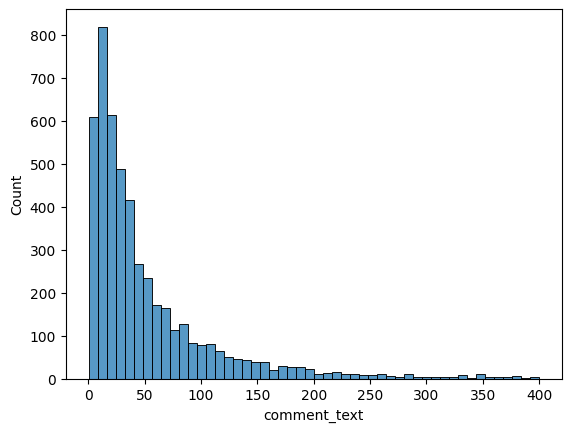

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.plot(1,2,1)
sns.histplot(data=filtered_data, bins=50) 


In [121]:
labels = []
text = []
for idx,rows in data.iterrows():
    # print(idx)
    # print(rows['comment_text'])
    text.append(rows['comment_text'])
    labels.append([rows['toxic'],rows['severe_toxic'],rows['obscene'],rows['threat'],rows['insult'],rows['identity_hate']])
    # break
print(len(text)),print(len(labels))

4936
4936


(None, None)

In [122]:
import random

In [123]:
i = random.randint(0,len(text))
print(f'i:{i}')
text[i],labels[i]

i:4701


("Your bias has made you say some unbelievably stupid things. \n\nExplain to me how a video can be unreliable? Will you just do that for me. Explain to me how something that is captured on video can be unreliable. Surely you don't mean to suggest that someone at one of the graphic arts studios spent millions of dollars attempting to create a video of Susan Roesgen saying things that she didn't say. I mean, do you REALLY believe that? If so, I suggest you get help. If not, you really need to quit letting your bias govern your interpretations, if not for the sake of Wikipedia, for the sake of other people not viewing you as a lunatic.",
 [0, 0, 0, 0, 1, 0])

In [124]:
labels[:3]

[[0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0]]

In [125]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased",return_type = 'pt')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [126]:
class preparedata(Dataset):
    def __init__(self,text,labels,tokenizer,
                max_length):
        self.text = text
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_length
        
    def __len__(self):
        return len(self.text)
    def __getitem__(self,idx):
        
        text_token = self.tokenizer(self.text[idx], truncation = True, padding = 'max_length', max_length = self.max_len,return_tensors = 'pt')
        # texts.append(text_token)
        # labels.append(self.labels[idx])
        labels = torch.tensor(self.labels[idx], dtype=torch.float)
        # print(f'labels:{labels}')
        
        return {
    'input_ids': text_token['input_ids'],
    'attention_mask': text_token['attention_mask'],
    'label_ids': labels,
}


In [127]:
# example =  tokenizer(text[0], truncation = True, padding = 'max_length', max_length = 150,return_tensors = 'pt')
# print(example)

In [128]:
dataset = preparedata(text,
                     labels,
                     tokenizer,
                     max_length = 150)

In [129]:
dataloader = DataLoader(
    dataset = dataset,
    batch_size = 32,
    shuffle = True,num_workers = 0 
)

In [130]:
data_iter = iter(dataloader)
new_point = next(data_iter)

In [131]:
len(data_iter)

155

In [132]:
len(data_iter) * len(new_point)

465

In [133]:
# new_point

In [134]:
new_point['input_ids'].shape

torch.Size([32, 1, 150])

In [135]:
new_point['label_ids'].shape

torch.Size([32, 6])

# Building a model

In [136]:
from torch import nn

In [137]:
new_point['input_ids']

tensor([[[  101,  1000,  2720,  ...,  2030,  2024,   102]],

        [[  101,  6901,  3021,  ...,     0,     0,     0]],

        [[  101, 11333, 11057,  ...,     0,     0,     0]],

        ...,

        [[  101,  3674,  6115,  ...,     0,     0,     0]],

        [[  101, 16948, 19237,  ...,     0,     0,     0]],

        [[  101,  1011,  1998,  ...,     0,     0,     0]]])

In [138]:
max_index = torch.max(new_point['input_ids'])
print(max_index)

tensor(29441)


In [139]:
vocab_size = 30522

In [140]:
emb_layer = nn.Embedding(num_embeddings = vocab_size,
                                          embedding_dim = 16)

test1 = emb_layer(new_point['input_ids'])

In [141]:
test1.shape

torch.Size([32, 1, 150, 16])

In [156]:
class lstm_model(nn.Module):
    def __init__(self,
                vocab_size,
                output):
        super().__init__()
        self.Embedding_layer = nn.Embedding(num_embeddings =vocab_size ,
                                          embedding_dim = 32)
        self.linear_layer =   nn.Linear(32,64)
        self.relu = nn.ReLU()
        self.lstm1 = nn.LSTM(64,128,
                   bidirectional = True, batch_first = True)
        self.lstm2 = nn.LSTM(128*2,64,
                   bidirectional = True,batch_first = True)
        
        self.output = nn.Linear(64*2,output)

    def forward(self,x):
        x = x.squeeze(1)
        # print(f'going inside: {x.shape}')
        x = self.Embedding_layer(x)
        # print(f'coming outside:{x.shape}')
        
        x = self.linear_layer(x)
        x = self.relu(x)
        # print(f'x before:{x.shape}')
        x,_ = self.lstm1(x)
        x,_ = self.lstm2(x)
        # print(f'after {x.shape}')
        x = self.output(x)
        x = x.mean(dim=1)
        return x
        
    

In [157]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [158]:
model = lstm_model(vocab_size = vocab_size, output = 6).to(device)


In [159]:
tryp = new_point['input_ids'][0].to(device)
tryp=tryp.unsqueeze(1)
print(tryp.shape)

torch.Size([1, 1, 150])


In [160]:
sample = model(tryp)
sample.shape

torch.Size([1, 6])

In [161]:
sample

tensor([[-0.0028, -0.0306, -0.0489, -0.0060,  0.0541, -0.0544]],
       device='cuda:0', grad_fn=<MeanBackward1>)

In [162]:
input_tensor = torch.randint(0, vocab_size, (32, 150))
input_tensor.shape

torch.Size([32, 150])

In [163]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [164]:
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [165]:
import torchmetrics

In [166]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, batch_data in enumerate(dataloader):
        # Send data to target device

        X = batch_data['input_ids']
        y = batch_data['label_ids']
        X, y = X.to(device), y.to(device)

        model = model.to(device)
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        # y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        
        # train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        # threshold = 0
        # print(f'yprd:{y_pred}')
        # preds = y_pred>0
        # train_acc += torchmetrics.Accuracy(multiclass=True)(preds, y.int()) 
    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    # train_acc = train_acc / len(dataloader)
    return train_loss

           

In [167]:
# train_step(model = model, dataloader = dataloader,loss_fn =loss, optimizer = optimizer, device = device)

In [168]:
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]} 
    For example if training for epochs=2: 
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }
    
    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)

    # Return the filled results at the end of the epochs
    return results

In [169]:
results = train(model = model, train_dataloader = dataloader,loss_fn =loss, optimizer = optimizer, epochs = 150,device = device)

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4198 | 
Epoch: 2 | train_loss: 0.3962 | 
Epoch: 3 | train_loss: 0.3466 | 
Epoch: 4 | train_loss: 0.2915 | 
Epoch: 5 | train_loss: 0.2583 | 
Epoch: 6 | train_loss: 0.2437 | 
Epoch: 7 | train_loss: 0.2351 | 
Epoch: 8 | train_loss: 0.2230 | 
Epoch: 9 | train_loss: 0.2159 | 
Epoch: 10 | train_loss: 0.2100 | 
Epoch: 11 | train_loss: 0.2013 | 
Epoch: 12 | train_loss: 0.1979 | 
Epoch: 13 | train_loss: 0.1935 | 
Epoch: 14 | train_loss: 0.1942 | 
Epoch: 15 | train_loss: 0.1878 | 
Epoch: 16 | train_loss: 0.1831 | 
Epoch: 17 | train_loss: 0.1807 | 
Epoch: 18 | train_loss: 0.1774 | 
Epoch: 19 | train_loss: 0.1731 | 
Epoch: 20 | train_loss: 0.1669 | 
Epoch: 21 | train_loss: 0.1667 | 
Epoch: 22 | train_loss: 0.1625 | 
Epoch: 23 | train_loss: 0.1582 | 
Epoch: 24 | train_loss: 0.1530 | 
Epoch: 25 | train_loss: 0.1558 | 
Epoch: 26 | train_loss: 0.1475 | 
Epoch: 27 | train_loss: 0.1447 | 
Epoch: 28 | train_loss: 0.1406 | 
Epoch: 29 | train_loss: 0.1374 | 
Epoch: 30 | train_loss:

In [194]:
def test_cust(input_txt,model = model):
    in_tokenized = tokenizer(input_txt, truncation = True, padding = 'max_length', max_length = 150,return_tensors = 'pt')
    ids = in_tokenized['input_ids']
    # print(ids.shape)
    model.to(device)
    ids = ids.unsqueeze(0)
    # print(ids.shape)
    output_t = model(ids.to(device)).squeeze(0)
    pre = output_t>0
    final = [1 if item else 0 for item in pre]
    return final,output_t
    
    

In [171]:
text1 = 'you are a good man' 
text2 = 'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK' # 11010
text3 = "SuPeRTR0LL WiLL LiVe FoReVeR!\niF You DoN'T Re..." #1011
text4 ='I will kill you'

In [172]:
output,logits = test_cust(text3)

In [173]:
output

[0, 0, 0, 0, 0, 0]

In [174]:
# results

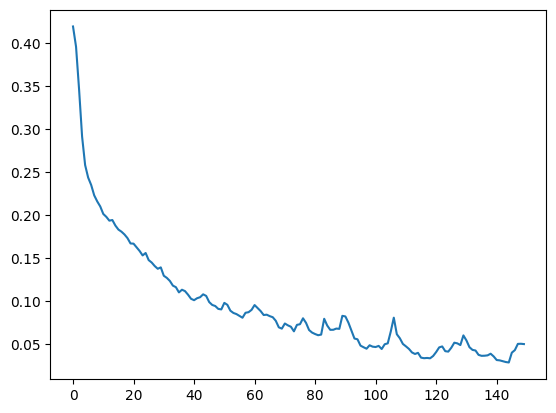

In [175]:
plt.plot(results['train_loss'])

In [176]:
len(test_data)

56

In [177]:
test_labels = []
test_text = []
for idx,rows in test_data.iterrows():
    # print(idx)
    # print(rows['comment_text'])
    test_text.append(rows['comment_text'])
    test_labels.append([rows['toxic'],rows['severe_toxic'],rows['obscene'],rows['threat'],rows['insult'],rows['identity_hate']])
    # break
print(len(test_text)),print(len(test_labels))

56
56


(None, None)

In [178]:
check = {'comment_text': test_text,
        'original_labels': test_labels}


In [179]:
check_df = pd.DataFrame(check)

In [180]:
check_df.head()

,comment_text,original_labels
0,FYI \n\nHey you! yes you! You really are a mas...,"[0, 0, 1, 0, 1, 0]"
1,^^Why not ban him indefinitely like you did fo...,"[0, 0, 1, 0, 0, 0]"
2,You got what had been coming to you. I hope th...,"[0, 0, 1, 0, 0, 0]"
3,"""\n\n Treivas, Miller: you think you're safe o...","[0, 0, 1, 1, 1, 0]"
4,"Circumcision debate \n\nJake, I've moved your ...","[0, 0, 1, 0, 0, 0]"


In [181]:
test_preds = []
for ids,rows in check_df.iterrows():
    output,_ = test_cust(rows['comment_text'])
    test_preds.append(output)
len(test_preds)

56

In [182]:
check_df['test_preds'] = test_preds

In [183]:
check_df.head(50)

,comment_text,original_labels,test_preds
0,FYI \n\nHey you! yes you! You really are a mas...,"[0, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0]"
1,^^Why not ban him indefinitely like you did fo...,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
2,You got what had been coming to you. I hope th...,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
3,"""\n\n Treivas, Miller: you think you're safe o...","[0, 0, 1, 1, 1, 0]","[0, 0, 1, 1, 1, 0]"
4,"Circumcision debate \n\nJake, I've moved your ...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
5,"""\nHey, IPadPerson, please try to keep """"fuck""...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 1, 0]"
6,"""\n\n"""" but unfortunately I had to undo your e...","[0, 0, 1, 0, 1, 0]","[0, 0, 1, 0, 1, 0]"
7,"""Just face the truth: you can't escape it!==\n...","[0, 0, 1, 0, 1, 1]","[0, 0, 1, 0, 1, 1]"
8,it becomes the primary reason why the Internet...,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
9,Decline unblock \n\nYou declined my unblock re...,"[0, 0, 1, 0, 1, 0]","[0, 0, 1, 0, 1, 0]"


In [184]:
import torch
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

def calculate_multilabel_metrics(y_true, y_pred, threshold=0.5):

    
    if not isinstance(y_true, torch.Tensor):
        y_true = torch.tensor(y_true)
    if not isinstance(y_pred, torch.Tensor):
        y_pred = torch.tensor(y_pred)
    
    # Convert predictions to binary using threshold
    y_pred_binary = (y_pred >= threshold).float()
    
   
    y_true_np = y_true.numpy()
    y_pred_np = y_pred_binary.numpy()
    
    exact_match = (y_true == y_pred_binary).all(dim=1).float().mean().item()
    
    
    per_label_accuracy = (y_true == y_pred_binary).float().mean(dim=0)
    
    # Calculate hamming accuracy (proportion of correct predictions)
    hamming_acc = 1 - hamming_loss(y_true_np, y_pred_np)
    
    # Calculate F1 score
    f1_micro = f1_score(y_true_np, y_pred_np, average='micro')
    f1_macro = f1_score(y_true_np, y_pred_np, average='macro')
    
    return {
        'exact_match_accuracy': exact_match,
        'per_label_accuracy': per_label_accuracy.tolist(),
        'hamming_accuracy': hamming_acc,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro
    }



In [185]:
metrics = calculate_multilabel_metrics(test_labels, test_preds)

In [186]:
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value}")

exact_match_accuracy: 0.875
per_label_accuracy: [0.9642857313156128, 0.9821428656578064, 1.0, 0.9642857313156128, 0.9642857313156128, 1.0]
hamming_accuracy: 0.9791666666666666
f1_micro: 0.9580838323353292
f1_macro: 0.9447691197691198


In [187]:
torch.save(model.state_dict(), 'lstm_model.pth')

In [192]:
model_test = lstm_model(vocab_size=vocab_size,output = 6)
model_test.load_state_dict(torch.load('lstm_model.pth'))

<ipython-input-192-e5e2edf0507c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('lstm_model.pth'))


<All keys matched successfully>

In [195]:
# model_test = torch.load('/kaggle/working/lstm_model.pth',weights_only = False)
output,logits = test_cust('you suck it big time \n\nyou suck it big time',model_test)

In [196]:
output

[1, 0, 1, 0, 1, 0]